# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")
sns.set()

# I- Build Data

In [2]:
# Import info data

df = pd.read_excel ('C:/Users/USER/Desktop/stage ing/stage ing partie 2/New_1/INFO_subjects.xlsx')

# Change the nan values 

df = df.replace ({np.nan : 'no'})

In [3]:
df

,dataset,ID_from,ID_to,diagnosis,sex,age,Nombre_Cycle,Cycle1_D,Cycle1_F,Cycle2_D,...,Cycle10_D,Cycle10_F,Cycle11_D,Cycle11_F,Cycle12_D,Cycle12_F,Cycle13_D,Cycle13_F,Etat_D,Etat_F
0,train,1,100,healthy,m,26,3,1,18,30,...,no,no,no,no,no,no,no,no,1,0
1,train,101,200,healthy,m,23,5,106,120,125,...,no,no,no,no,no,no,no,no,1,1
2,train,201,300,healthy,m,27,3,201(non),207,208,...,no,no,no,no,no,no,no,no,0,1
3,train,301,400,healthy,f,23,7,301,315,316,...,no,no,no,no,no,no,no,no,1,1
4,train,401,500,healthy,f,26,6,401(non),411,412,...,no,no,no,no,no,no,no,no,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,test,1001,1100,polyp,f,22,5,1001(non),1009,1010,...,no,no,no,no,no,no,no,no,0,0
126,test,1101,1200,polyp,m,75,11,1104,1111,1112,...,1182,1189,1190,1198,no,no,no,no,1,1
127,test,1201,1300,carcinoma,f,72,4,1201,1222,1223,...,no,no,no,no,no,no,no,no,1,1
128,test,1301,1400,carcinoma,m,76,4,1301,1324,1325,...,no,no,no,no,no,no,no,no,1,0


In [4]:
# Rename the columns

data = pd.DataFrame(columns=['ID_P','dataset','ID_from','ID_to','diagnosis',
                             'sex','age','ID_Cy','Cy_from','Cy_to','state','duration'])

In [5]:
# Build the new data 

i=0
l=0
for x in df.itertuples():
    
    j=0
    
    for k in range(0,26,2):
        
        val1= x[8+k]
        val2= x[8+k+1]
            
        if (str(val1) not in 'no') and (str(val2) not in 'no'):
            
            l+=1
    
            if 'non' in str(val1) : 
                state= 0 # incomplet 
                val1 =val1.replace('(non)','')
                val1=val1.replace(' ','')
                val1=float(val1)
                duration = val2 - val1 + 1 
                
            elif 'non' in str(val2) :
                state = 0  # incomplet
                val2 =val2.replace('(non)','')
                val2=val2.replace(' ','')
                val2=float(val2)
                duration = val2 - val1 + 1 
                
            else : 
                state = 1 # complet 
                duration = val2 - val1 + 1 
                
            data.loc[l]=[i,x[1],x[2],x[3],x[4],x[5],x[6],j,val1,val2,state,duration] 
            j+=1
    i+=1
data = data.set_index(['ID_P','ID_Cy'])
data['duration']=data['duration'].astype(int)

In [6]:
data

dataset ID_from ID_to  diagnosis sex age Cy_from Cy_to state  \
ID_P ID_Cy                                                                
0    0       train       1   100    healthy   m  26       1    18     1   
     1       train       1   100    healthy   m  26      30    47     1   
     2       train       1   100    healthy   m  26      60    77     1   
     3       train       1   100    healthy   m  26      89   100     0   
1    0       train     101   200    healthy   m  23     106   120     1   
...            ...     ...   ...        ...  ..  ..     ...   ...   ...   
129  0        test    1401  1500  carcinoma   m  54    1401  1423     1   
     1        test    1401  1500  carcinoma   m  54    1424  1444     1   
     2        test    1401  1500  carcinoma   m  54    1445  1466     1   
     3        test    1401  1500  carcinoma   m  54    1467  1486     1   
     4        test    1401  1500  carcinoma   m  54    1487  1500     0   

            duration  
ID_P ID_Cy            
0    0            18  
     1            18  
     2            18  
     3            12  
1    0            15  
...              ...  
129  0            23  
     1            21  
     2            22  
     3            20  
     4            14  

[839 rows x 10 columns]

In [7]:
# Save the data 
data.reset_index(inplace=True)
data.to_excel('C:/Users/USER/Desktop/stage ing/stage ing partie 2/New_1/INFO_subjects_out.xlsx')

# II- Duration plots for all cycles

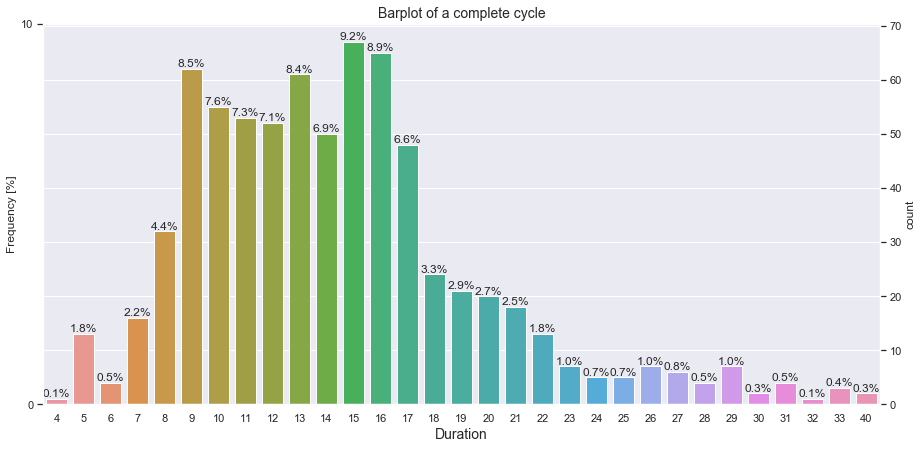

In [8]:
# Duration data

data1 = data.loc[data.state==1]['duration']
ncount = len(data1)
maxi = max(data1.value_counts())

# Barplot

plt.figure(figsize=(15,7))
ax = sns.countplot(data1);
plt.title('Barplot of a complete cycle',fontsize=14)
plt.xlabel('Duration',fontsize=14)

# Make twin axis

ax2=ax.twinx()

# Switch so count axis is on right, frequency on left

ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over

ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

# Add frequencies

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
ax2.yaxis.set_ticks([0,10])
ax2.grid(None)

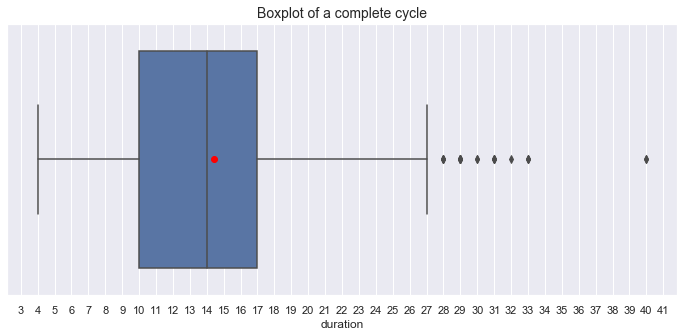

In [9]:
# Boxplot

plt.figure(figsize=(12,5))
plt.title('Boxplot of a complete cycle',fontsize=14)
plt.xticks(range(42))
sns.boxplot(data1,orient="h" , showmeans = True , meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"red"});

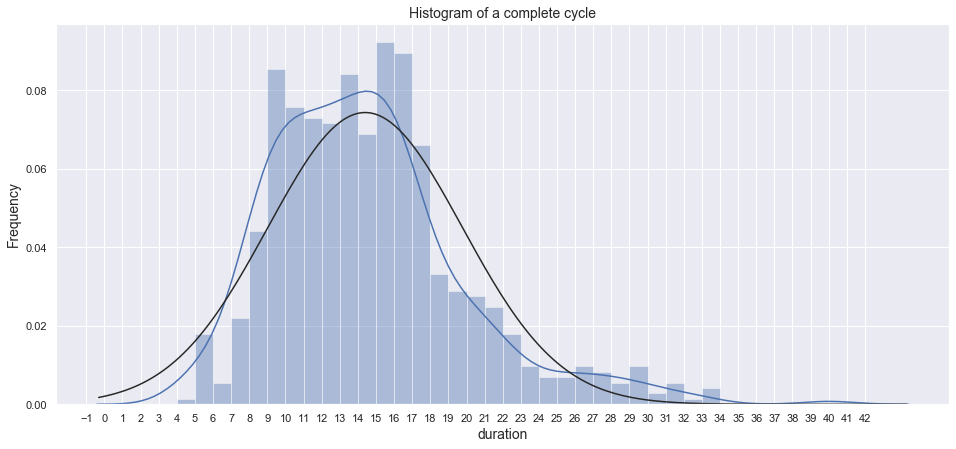

In [10]:
# Distribution

plt.figure(figsize=(16,7))
plt.title('Histogram of a complete cycle',fontsize=14)
plt.xticks(range(-1,43))
plt.xlabel('Duration',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
sns.distplot(data1,bins=range(40),color='b', fit = norm );

# III- The distribution of healthy and unhealthy observations

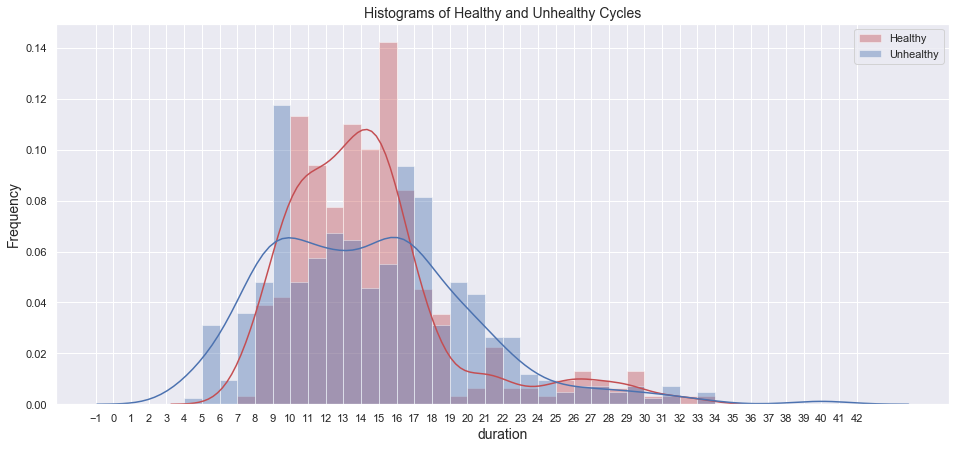

In [11]:
# The distribution of healthy and unhealthy observations

plt.figure(figsize=(16,7))
plt.title('Histograms of Healthy and Unhealthy Cycles',fontsize=14)
plt.xlabel('Duration',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.xticks(range(-1,43))
sns.distplot(data1.loc[data.diagnosis=='healthy'],color='r',bins=range(40),label='Healthy')
sns.distplot(data1.loc[data.diagnosis!='healthy'],color='b',bins=range(40),label='Unhealthy')
plt.legend()
plt.show()

# IV- The GAW

In [12]:
# Complete data

data2=data.loc[data.state==1]

# Create class variable

data2['class']=1 # For unhealthy 
data2.loc[data2.diagnosis=='healthy','class']=0 # For healthy 

In [13]:
# Read the GAW data

GAW = pd.read_csv("C:/Users/USER/Desktop/stage ing/stage ing partie 2/New_1/gaw.csv",sep=",",header=None,error_bad_lines=False)

In [14]:
# Re-indew the data 

GAW=GAW.set_index(data2.index)

# Concatenate with data for full cycles

new_dd1= pd.concat([data2,GAW],axis=1)

ValueError: Length mismatch: Expected 729 rows, received array of length 728

In [ ]:
# Create a new dataset for each category

dd1=new_dd1.loc[new_dd1.diagnosis=='healthy'].iloc[:,11:]
dd2=new_dd1.loc[new_dd1.diagnosis!='healthy'].iloc[:,11:]
dd3=new_dd1.loc[new_dd1.diagnosis=='paresis'].iloc[:,11:]
dd4=new_dd1.loc[new_dd1.diagnosis=='polyp'].iloc[:,11:]
dd5=new_dd1.loc[new_dd1.diagnosis=='functional dysphonia'].iloc[:,11:]
dd6=new_dd1.loc[new_dd1.diagnosis=='carcinoma'].iloc[:,11:]

In [ ]:
# The mean of the gaw 

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(dd1.mean(axis=0),label='Healthy')

plt.title('Mean of the GAW')
plt.xlabel('Frames')
plt.ylabel('Area')
plt.legend()

plt.subplot(122)
plt.plot(dd2.mean(axis=0),label='Unhealthy')
plt.title('Mean of the GAW')
plt.xlabel('Frames')
plt.legend()
plt.show()


In [ ]:
# The mean of the gaw 

plt.figure(figsize=(15,7))

plt.plot(dd1.mean(axis=0),label='Healthy')
#plt.plot(dd1.mean(axis=0),marker='o',c='b')
plt.plot(dd2.mean(axis=0),label='Unhealthy',c='r')
plt.title('Mean of the GAW')
plt.xlabel('Frames')
plt.ylabel('Area')
plt.legend()
plt.show()

In [ ]:
# The mean of the gaw 

plt.figure(figsize=(15,7))

plt.subplot(221)
plt.plot(dd3.mean(axis=0),label='paresis')
plt.title('Mean of the GAW')
plt.ylabel('Area')
plt.legend()

plt.subplot(222)
plt.plot(dd4.mean(axis=0),label='polyp')
plt.title('Mean of the GAW')
plt.legend()

plt.subplot(223)
plt.plot(dd5.mean(axis=0),label='functional dysphonia')
plt.ylabel('Area')
plt.xlabel('Frames')
plt.legend()

plt.subplot(224)
plt.plot(dd6.mean(axis=0),label='carcinoma')
plt.xlabel('Frames')
plt.legend()

plt.show()

In [ ]:
# The mean of the gaw 

plt.figure(figsize=(15,7))

plt.plot(dd3.mean(axis=0),label='paresis')
plt.plot(dd4.mean(axis=0),label='polyp')
plt.plot(dd5.mean(axis=0),label='functional dysphonia')
plt.plot(dd6.mean(axis=0),label='carcinoma')
plt.title('Mean of the GAW')
plt.xlabel('Frames')
plt.ylabel('Area')
plt.legend()
plt.show()

In [ ]:
# The mean of the gaw 

plt.figure(figsize=(15,7))

plt.subplot(221)
plt.plot(dd1.mean(axis=0),label='Healthy')
plt.plot(dd3.mean(axis=0),label='paresis')
plt.title('Mean of the GAW')
plt.ylabel('Area')
plt.legend()

plt.subplot(222)
plt.plot(dd1.mean(axis=0),label='Healthy')
plt.plot(dd4.mean(axis=0),label='polyp')
plt.title('Mean of the GAW')
plt.legend()

plt.subplot(223)
plt.plot(dd1.mean(axis=0),label='Healthy')
plt.plot(dd5.mean(axis=0),label='functional dysphonia')
plt.ylabel('Area')
plt.xlabel('Frames')
plt.legend()

plt.subplot(224)
plt.plot(dd1.mean(axis=0),label='Healthy')
plt.plot(dd6.mean(axis=0),label='carcinoma')
plt.xlabel('Frames')
plt.legend()

plt.show()